# Part 23 of Recipes: Naming Names

This page is primarily based on the following page at the Circos documentation site:



- [23. Naming Names](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 22 by clicking [here &#8592;](Recipes_Part22.ipynb).



----



8 --- Recipes
=============

23. Naming Names
----------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/naming_names/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/naming_names/images){.normal}
[Configuration](/documentation/tutorials/recipes/naming_names/configuration){.normal}
:::

One of the first uses of Circos in popular print was Jonathan Corum\'s
[Naming
Names](http://www.nytimes.com/interactive/2007/12/15/us/politics/DEBATE.html)
graphic in the New York Times, which visualized the names used by major
presidential candidates in the series of Democratic and Republican
debates leading up to the Iowa caucuses.

This tutorial shows you how to create this kind of image.

### not just for genomics

[Jonathan Corum describes the use of Circos for this
graphic](http://www.nytimes.com/2008/02/25/business/media/25asktheeditors.html?pagewanted=5&_r=1):

*The circle design was created with an impressive piece of software
called Circos, which was originally built to visualize genomic data. To
make it work I had to encode the entire series of debates as if it was a
genome. So each presidential candidate was a chromosome, and each debate
was a chromosome band, and each spoken word was a nucleotide. It sounds
a bit ridiculous, but that was all behind the scenes. The end result is
a fairly simple interactive graphic, but hopefully one that caught the
eye and allowed readers to find patterns across the long series of
debates.*

The most difficult part of creating a Circos image---any visualization
for that matter---is deciding what data to show. Chances are your data
is too complex to show (e.g. its native format doesn\'t have a trivial
visual encoding, such as a scatter plot).

Mapping data onto a Circos figure requires that you identify what
patterns in your data are (a) likely to be important and (b) likely to
be present, and create a figure that exposes such patterns. Remember, if
the pattern exists, you can\'t afford to miss it. If it doesn\'t exist,
you can\'t afford to be fooled into thinking that it\'s there, or left
wondering whether it\'s occluded by other data.

If you don\'t know where to start when creating Circos images from
genomic and non-genomic data, look through [published examples from the
literature](/images/scientific_literature/). Find images whose patterns
map onto your data types.

Don\'t think necessarily from the point of view of how to construct
input files. First, identify what you want to show and how. Make a
sketch of the kind of figure you want to make. This is the hard part.

### karyotype file

In the [Ideograms
Tutorial](/documentation/tutorials/ideograms/ideograms/) I have briefly
mentioned that ideograms can be used to depict any axis, not just a
stretch of sequence like a chromosome or contig. In this example, the
segments correspond to a candidate\'s total word delivery during all
debates.

The karyotype file defines these segments. For example, we\'ll say that
Obama delivered 2,000 words, Richardson 1,000 words, and so on. The
actual values would probably be much higher.

```ini
# karyotype.txt
chr - obama obama 0 2000 dem
chr - richardson richardson 0 1000 dem
chr - clinton clinton 0 1500 dem
chr - mccain mccain 0 1000 rep
chr - romney romney 0 1750 rep
chr - huckabee huckabee 0 1250 rep
```


The last field sets the color of the segments, according to the typical
blue/red scheme for republicans and democrats. I\'ve used the RGB values
used by Jonathan.

```ini
<<include etc/colors_fonts_patterns.conf>>
```


```ini
# append to the colors block
<colors>
rep = 211,121,111
dem = 85,143,190
</colors>
```


### segment slices

Each segment is divided into slices. The slice represents the number of
words delivered in a specific debate.

```ini
# slices.txt
obama 0 300     # Obama's 1st debate words
obama 301 750   #         2nd
obama 751 950   #         3rd
obama 951 1250  #         4th
obama 1251 1500 #         5th
obama 1501 2000 #         6th
```


These slices are drawn as hollow highlights on top of the ideograms,
with a thick white outline.

```ini
<plot>
file  = slices.txt
type  = highlight
r0    = dims(ideogram,radius_inner)
r1    = dims(ideogram,radius_outer)
fill_color       = undef
stroke_color     = white
stroke_thickness = 5
</plot>
```


### naming names

When a candidate mentions the name of another candidate during his
speech, we draw a link. The link starts at the debate slice in which the
other candidate name is mentioned. The link ends at the center of the
segment of the mentioned candidate.

```ini
# links.txt
# Obama mentions Clinton in his 1st debate
obama 150 150 clinton 750 750
# McCain mentions Clinton in his 3rd debate
mccain 875 875 clinton 750 750
# Huckabee mentions Clintin in his 2nd debate
huckabee 525 525 clinton 750 750
```


By default, the link color is set to `rep`, which is the republican red.

```ini
<link>
file      = links.txt
radius    = dims(ideogram,radius_inner)
bezier_radius = 0r
thickness = 5
color     = rep 
...
```


A rule is added to change the link color to `dem` if the refering
candidate is a democrat.

```ini
<rules>
<rule>
# set dem color if start is on a democrat
condition = var(chr1) =~ /obama|richardson|clinton/
color     = dem
</rule>
</rules>
```


### focusing on a candidate

To show links from a given candidate, use the `from()` function which
returns the name of the starting segment.

```ini
<rule>
# only links from obama are shown (all others are hidden by setting show=no)
# the condition test is equivalent to
#   var(chr1) ne "obama"
condition = ! from(obama)  
show      = no
</rule>
```


Or, to test the identity of the segment at the end of the link, use the
`to()` function.

```ini
<rule>
# only links to mccain are shown (all others are hidden by setting show=no)
# the condition test is equivalent to
#   var(chr2) ne "mccain"
condition = ! to(mccain)
show      = no
</rule>
```


Use the `fromto()` function to test both ends

```ini
<rule>
# only links from obama to mccain are shown (all others are hidden by setting show=no)
# the condition test is equivalent to
#   var(chr1) ne "obama" || var(chr2) ne "mccain"
condition = ! fromto(obama,mccain)
show      = no
</rule>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/23/

/home/jovyan/circos-tutorials-0.67/tutorials/8/23


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.39s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.39s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/23
debuggroup summary 0.39s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.39s loading configuration from file circos.conf
debuggroup summary 0.39s found conf file circos.conf
debuggroup summary 0.59s debug will appear for these features: output,summary
debuggroup summary 0.59s bitmap output image ./circos.png
debuggroup summary 0.59s SVG output image ./circos.svg
debuggroup summary 0.59s parsing karyotype and organizing ideograms
debuggroup summary 0.59s karyotype has 6 chromosomes of total size 8,506
debuggroup summary 0.60s applying global and local scaling
debuggroup summary 0.60s allocating image, colors and brushes
debuggroup summary 2.77s drawing 6 ideograms of total size 8,506
debuggroup summary 2.77s drawing highlights and ideograms
debuggroup summary 2.83s process

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

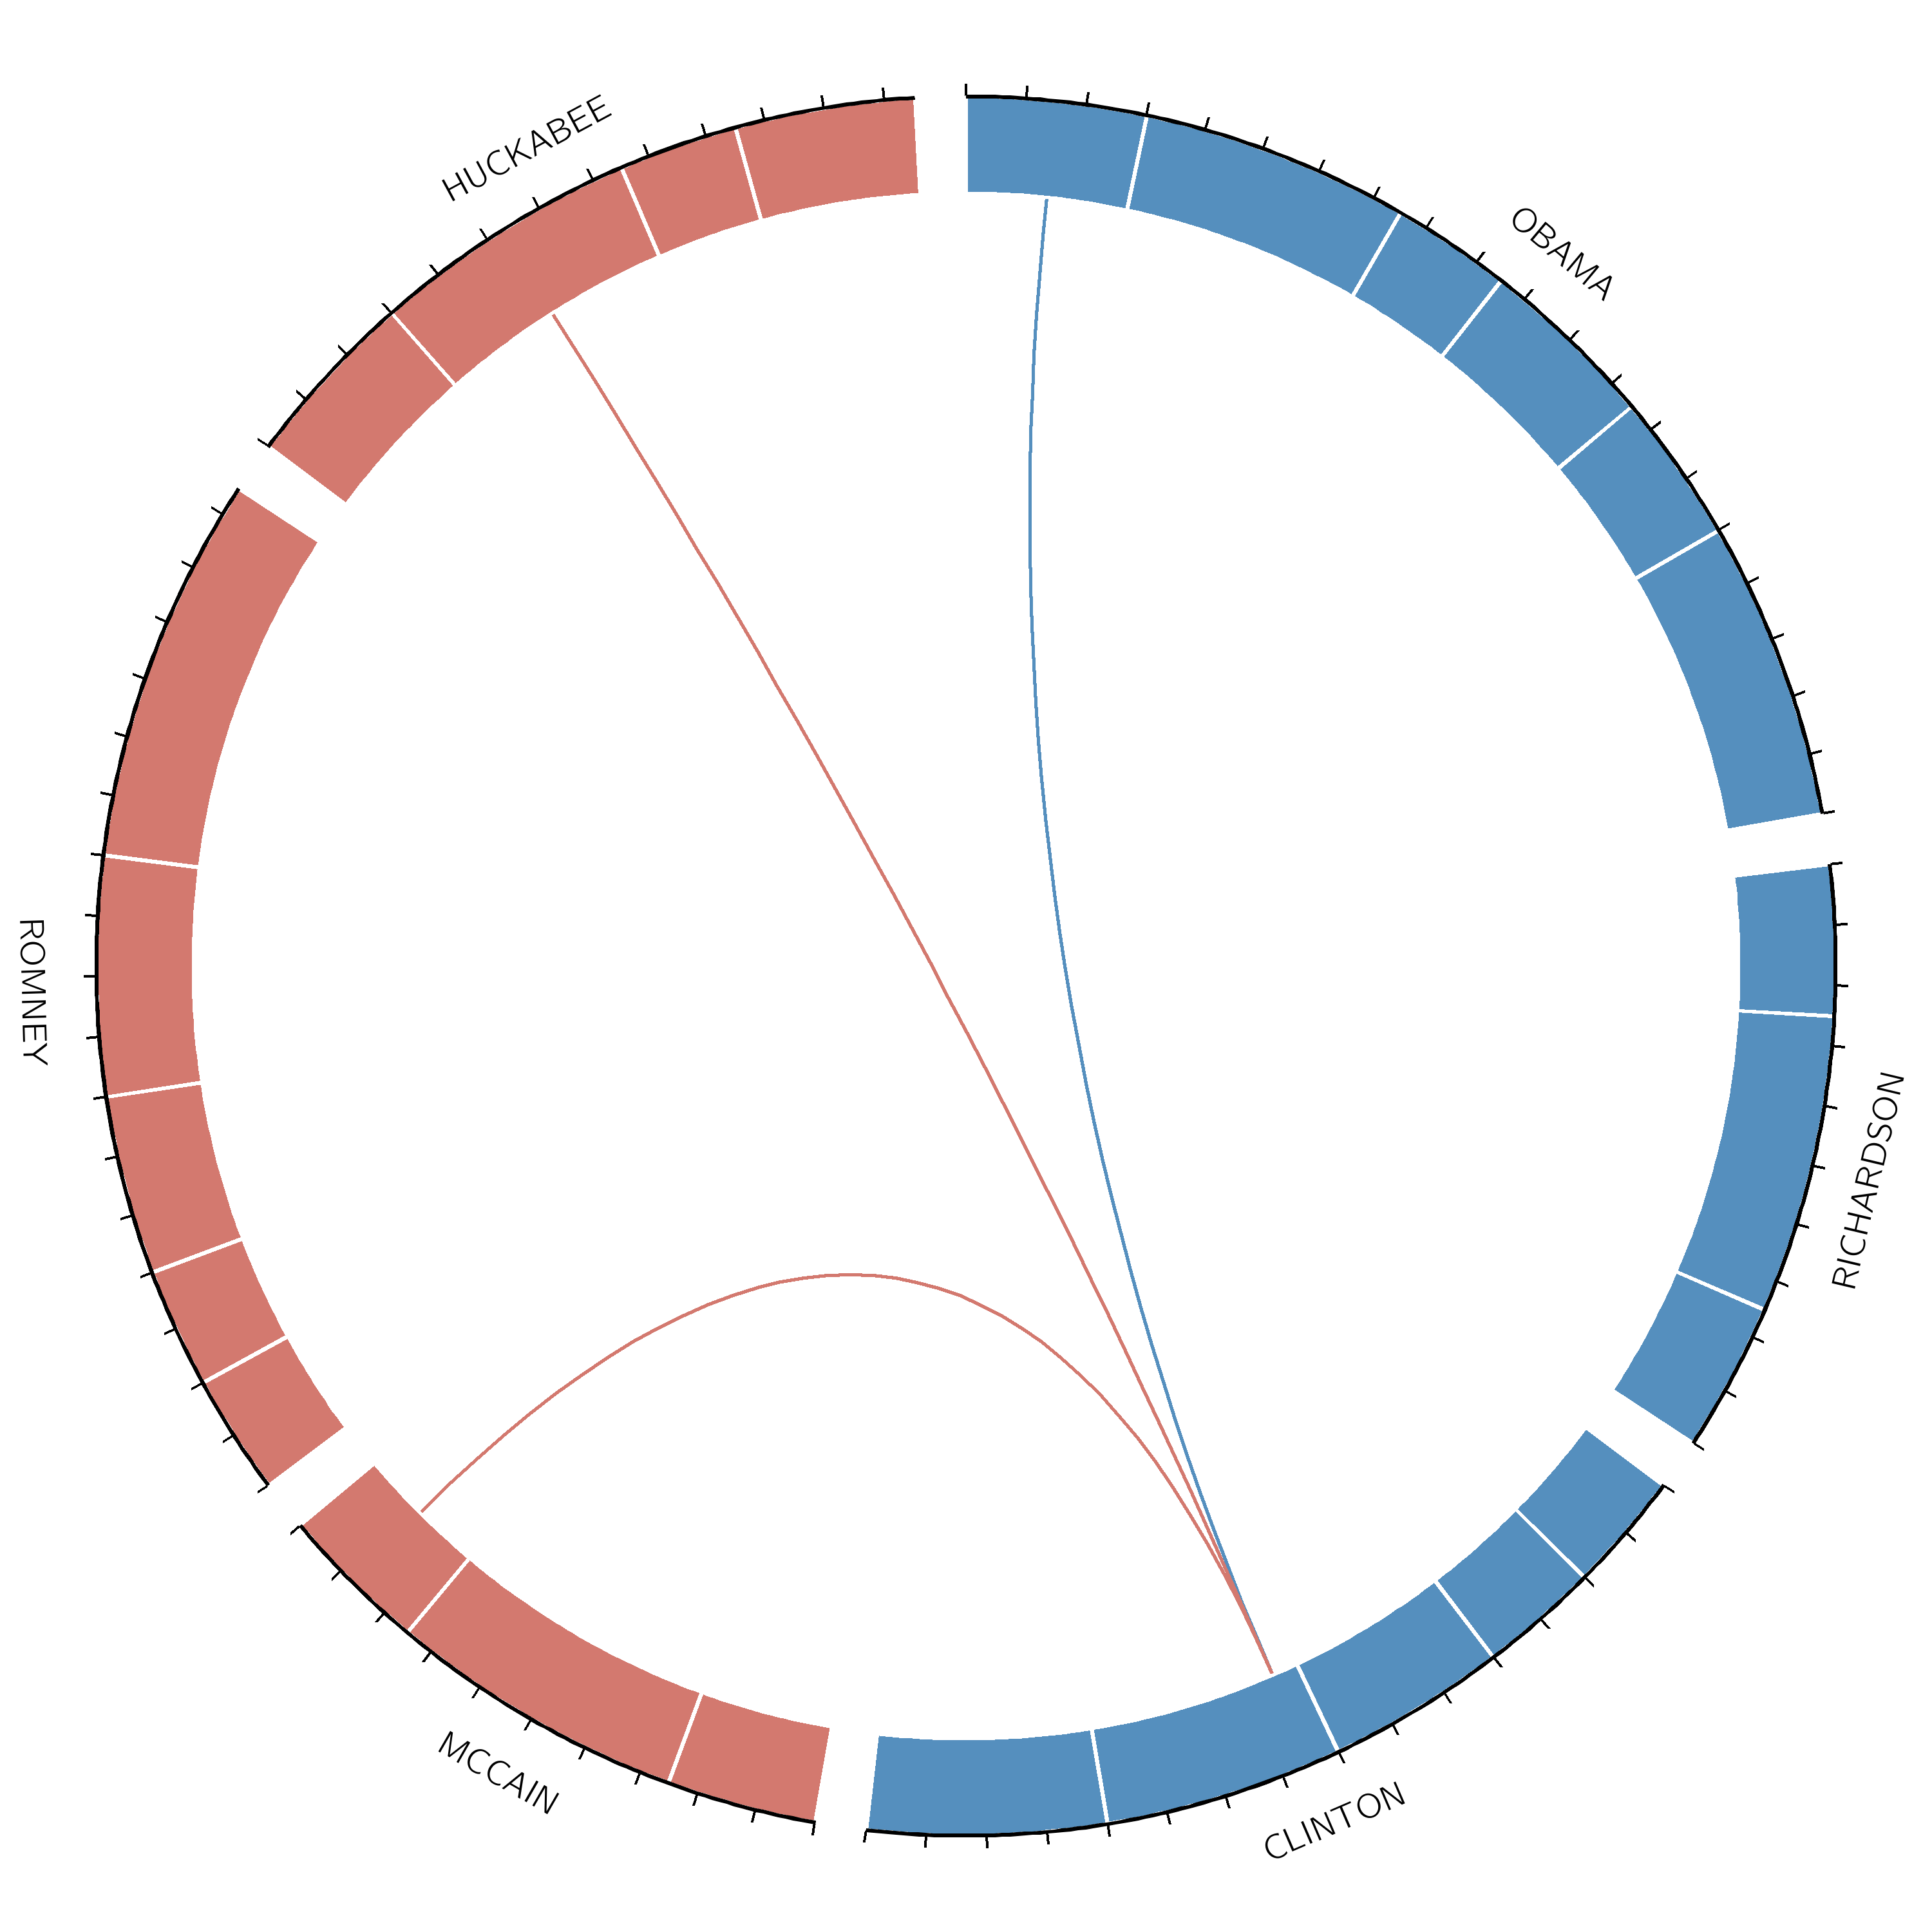

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](HelperTools_Part1.ipynb).

----